# Visualisations des vulnérabilités
Ce notebook génère l'ensemble des graphiques pour analyser les données issues de `data/consolidated.csv`.

Étape 4 : Consolidation des Données

Dans cette partie, nous allons mettre dans un dataframe, les données que nous avons extraites au préalable.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement et prétraitement
df = pd.read_csv('../data/consolidated.csv', sep=',')
df['cvss_score'] = pd.to_numeric(df['cvss_score'], errors='coerce')
df['epss_score'] = pd.to_numeric(df['epss_score'], errors='coerce')
df['date_pub'] = pd.to_datetime(df['date_pub'], errors='coerce')

# Affichage d'un aperçu
df.head()

,id_ansi,titre,type_bulletin,date_pub,cve_id,cvss_score,base_severity,cwe_id,epss_score,lien_bulletin,description,vendor,produit,versions
0,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,avis,2025-05-13 00:00:00+00:00,CVE-2025-4128,3.1,Moyenne,CWE-863,0.00021,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Mattermost versions 10.5.x <= 10.5.4, 9.11.x <...",Mattermost,Mattermost,10.5.0; 9.11.0
1,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,avis,2025-05-13 00:00:00+00:00,CVE-2025-4573,4.1,Moyenne,CWE-90,0.00022,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Mattermost versions 10.7.x <= 10.7.1, 10.6.x <...",Mattermost,Mattermost,10.5.0; 10.6.0; 10.7.0; 9.11.0
2,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,2025-05-13 00:00:00+00:00,CVE-2024-39592,7.7,Élevée,CWE-862,0.00136,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Elements of PDCE does not perform necessary\na...,SAP_SE,SAP PDCE,S4CORE 102; S4CORE 103; S4COREOP 104; S4COREOP...
3,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,2025-05-13 00:00:00+00:00,CVE-2025-0060,6.5,Élevée,CWE-94,0.00038,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,SAP BusinessObjects Business Intelligence Plat...,SAP_SE,SAP BusinessObjects Business Intelligence Plat...,2025; 430; ENTERPRISE 420
4,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,2025-05-13 00:00:00+00:00,CVE-2025-0061,8.7,Critique,CWE-497,0.00049,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,SAP BusinessObjects Business Intelligence Plat...,SAP_SE,SAP BusinessObjects Business Intelligence Plat...,2025; 430; ENTERPRISE 420


Étape 5 : Interprétation et Visualisation

Une fois les données insérées dans un dataframe, nous pouvons créer différents schémas et graphiques qui nous permettront d'analyser les différentes données. 

On peut voir sur ce graphique le score CVSS des différentes vulnérabilités 

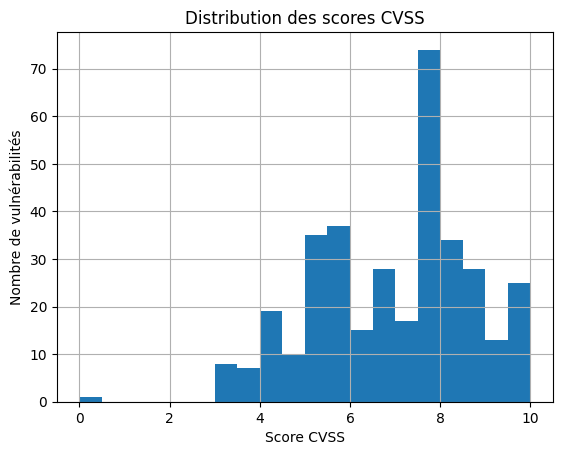

In [61]:
# 1. Histogramme des scores CVSS
plt.figure()
df['cvss_score'].dropna().hist(bins=20)
plt.title('Distribution des scores CVSS')
plt.xlabel('Score CVSS')
plt.ylabel('Nombre de vulnérabilités')
plt.show()

Nature des failles 

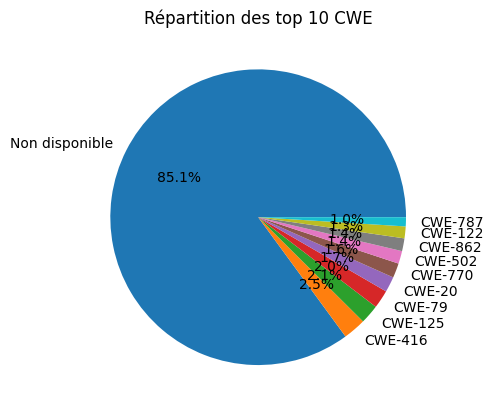

In [62]:
# 2. Camembert des top 10 CWE
cwe_counts = df['cwe_id'].fillna('Non disponible').value_counts().head(10)
plt.figure()
plt.pie(cwe_counts, labels=cwe_counts.index, autopct='%1.1f%%')
plt.title('Répartition des top 10 CWE')
plt.show()

Répartition des scores EPSS : majorité faibles, quelques très élevés.

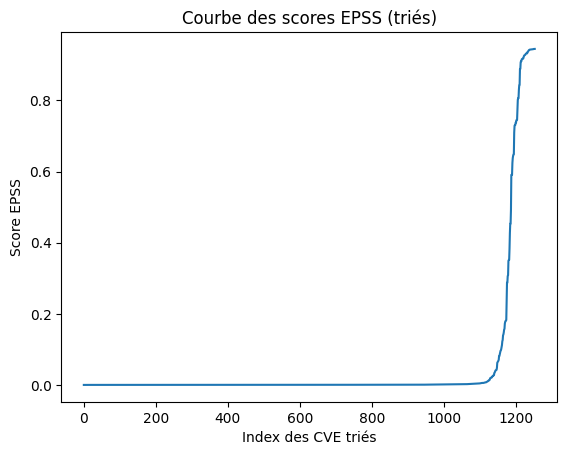

In [63]:
# 3. Courbe des scores EPSS triés
epss_sorted = df['epss_score'].dropna().sort_values().reset_index(drop=True)
plt.figure()
plt.plot(epss_sorted)
plt.title('Courbe des scores EPSS (triés)')
plt.xlabel('Index des CVE triés')
plt.ylabel('Score EPSS')
plt.show()

Relation entre le score EPSS et le score CVSS

Relation entre le score EPSS et le score

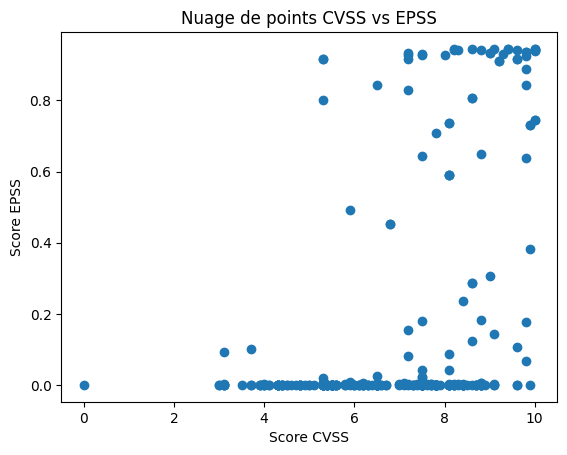

In [83]:
# 6. Nuage de points CVSS vs EPSS
plt.figure()
plt.scatter(df['cvss_score'], df['epss_score'])
plt.title('Nuage de points CVSS vs EPSS')
plt.xlabel('Score CVSS')
plt.ylabel('Score EPSS')
plt.show()

Permet de voir les CVE critiques

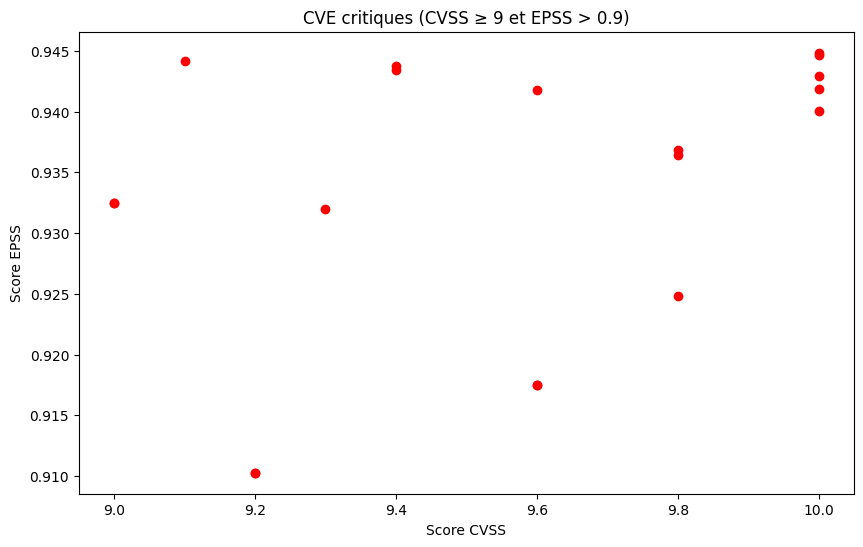

Liste des CVE critiques avec leurs scores :
CVE-2023-23397 - CVSS : 9.8 - EPSS : 0.93642
CVE-2023-27997 - CVSS : 9.2 - EPSS : 0.91027
CVE-2023-3519 - CVSS : 9.8 - EPSS : 0.92479
CVE-2023-35078 - CVSS : 10.0 - EPSS : 0.94485
CVE-2023-35082 - CVSS : 10.0 - EPSS : 0.94468
CVE-2023-20198 - CVSS : 10.0 - EPSS : 0.9419
CVE-2023-4966 - CVSS : 9.4 - EPSS : 0.94378
CVE-2024-21887 - CVSS : 9.1 - EPSS : 0.94416
CVE-2023-7028 - CVSS : 10.0 - EPSS : 0.94004
CVE-2024-21762 - CVSS : 9.6 - EPSS : 0.91751
CVE-2024-21413 - CVSS : 9.8 - EPSS : 0.93681
CVE-2024-3400 - CVSS : 10.0 - EPSS : 0.94294
CVE-2024-8963 - CVSS : 9.4 - EPSS : 0.94345
CVE-2025-0282 - CVSS : 9.0 - EPSS : 0.93244
CVE-2024-55591 - CVSS : 9.6 - EPSS : 0.94176
CVE-2025-0282 - CVSS : 9.0 - EPSS : 0.93244
CVE-2022-42475 - CVSS : 9.3 - EPSS : 0.93196
CVE-2023-27997 - CVSS : 9.2 - EPSS : 0.91027
CVE-2024-21762 - CVSS : 9.6 - EPSS : 0.91751


In [82]:
df_critique = df[(df['cvss_score'] >= 9) & (df['epss_score'] > 0.9)]

plt.figure(figsize=(10,6))
plt.scatter(df_critique['cvss_score'], df_critique['epss_score'], color='red')
plt.title('CVE critiques (CVSS ≥ 9 et EPSS > 0.9)')
plt.xlabel('Score CVSS')
plt.ylabel('Score EPSS')
plt.show()

print("Liste des CVE critiques avec leurs scores :")
for idx, row in df_critique.iterrows():
    print(f"{row['cve_id']} - CVSS : {row['cvss_score']} - EPSS : {row['epss_score']}")

Permet de voir quelles versions sont les plus touchés par 

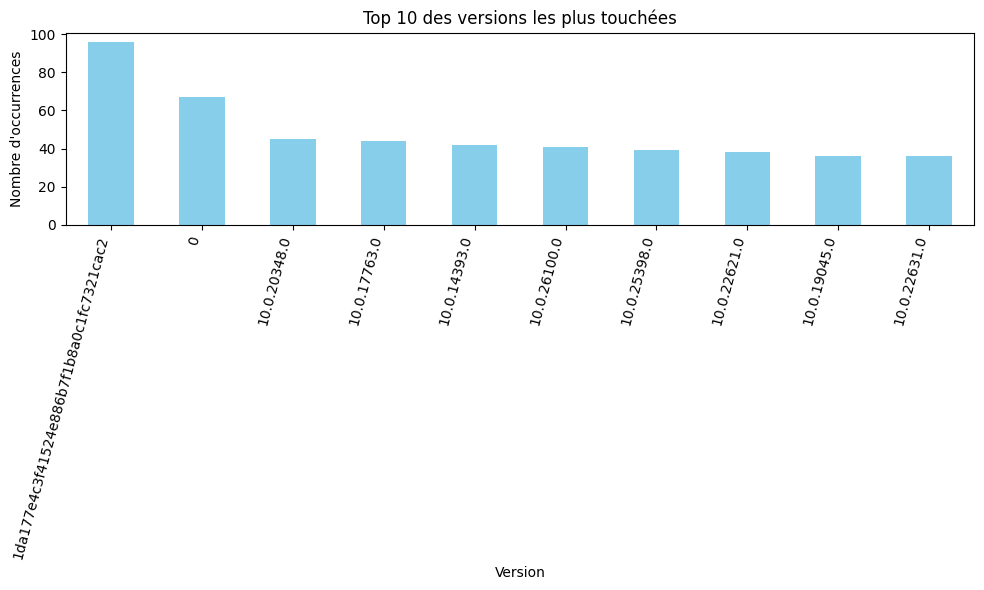

In [93]:
# 9. Top 10 des versions les plus touchées
df_versions = df[['versions']].dropna().copy()

# Séparer les versions dans une liste par ligne (split sur ;)
df_versions['versions_list'] = df_versions['versions'].str.split(';')

# Exploser la liste pour avoir une ligne par version
df_exp = df_versions.explode('versions_list')

# Nettoyer les espaces autour des versions
df_exp['versions_list'] = df_exp['versions_list'].str.strip()

# Compter les occurrences de chaque version, prendre les 10 premières
version_counts = df_exp['versions_list'].value_counts().head(10)

# Plot avec figure plus large pour éviter les coupures
plt.figure(figsize=(10,6))
version_counts.plot(kind='bar', color='skyblue')

plt.title('Top 10 des versions les plus touchées')
plt.xlabel('Version')
plt.ylabel("Nombre d'occurrences")

# Rotation des labels sur l'axe X pour une meilleure lisibilité
plt.xticks(rotation=75, ha='right', fontsize=10)

# Ajustement automatique des marges
plt.tight_layout()

plt.show()


<Figure size 640x480 with 0 Axes>

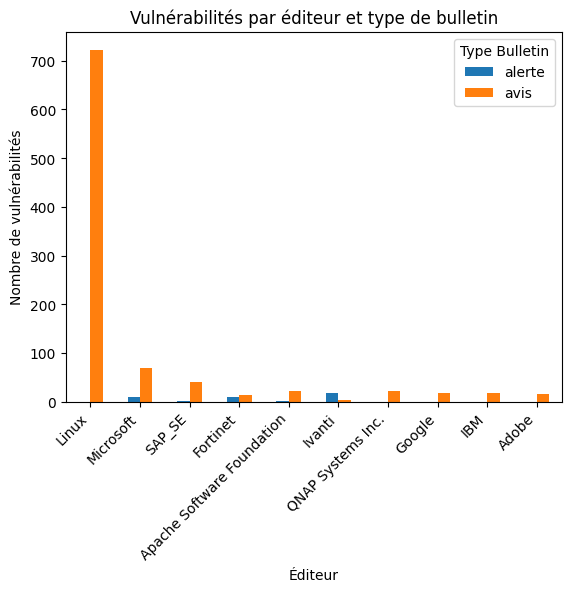

In [70]:
# 10. Vulnérabilités par éditeur et type de bulletin (avis vs alertes)
df_pivot = df.groupby(['vendor','type_bulletin']).size().unstack(fill_value=0)
df_pivot_top = df_pivot.loc[top_vendors]
plt.figure()
df_pivot_top.plot(kind='bar')
plt.title('Vulnérabilités par éditeur et type de bulletin')
plt.xlabel('Éditeur')
plt.ylabel('Nombre de vulnérabilités')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type Bulletin')
plt.show()

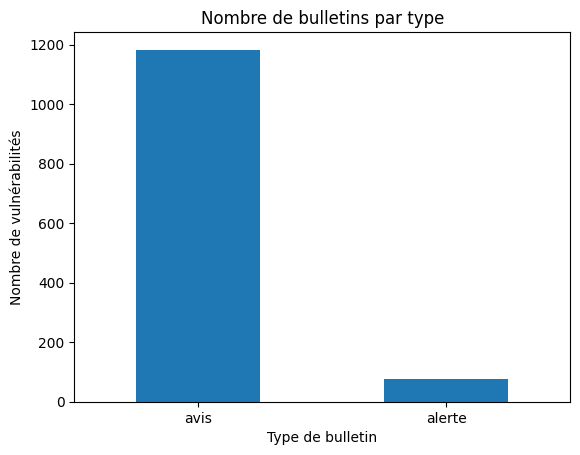

In [71]:
plt.figure()
df['type_bulletin'].fillna('Non spécifié').value_counts().plot(kind='bar')
plt.title('Nombre de bulletins par type')
plt.xlabel('Type de bulletin')
plt.ylabel('Nombre de vulnérabilités')
plt.xticks(rotation=0)
plt.show()

Étape 7 : Model Machine Learning

Dans cette partie, nous devons créer plusieurs algorithmes de machine Learning afin d'analyser nos données.


Le clustering permet de regrouper automatiquement des données similaires en clusters sans connaître à l'avance les étiquettes des classes. C'est donc un algorithme unsupervied learning.

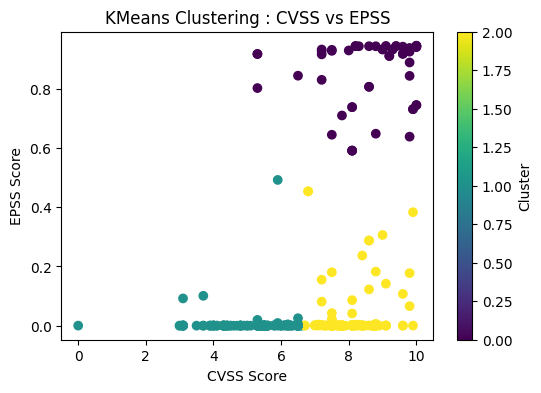

Silhouette Score (KMeans, k=3) : 0.63


In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Préparation des données
df_cluster = df[['cvss_score', 'epss_score']].dropna().copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Clustering KMeans avec k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df_cluster['cluster'] = clusters

# Visualisation
plt.figure(figsize=(6,4))
plt.scatter(df_cluster['cvss_score'], df_cluster['epss_score'], c=df_cluster['cluster'], cmap='viridis')
plt.title('KMeans Clustering : CVSS vs EPSS')
plt.xlabel('CVSS Score')
plt.ylabel('EPSS Score')
plt.colorbar(label='Cluster')
plt.show()

# Score de silhouette
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score (KMeans, k=3) : {score:.2f}")


C:\Users\ferac\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ferac\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ferac\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ferac\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ferac\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has

Meilleur k trouvé : 1 avec une accuracy moyenne de 0.9786


C:\Users\ferac\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ferac\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ferac\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ferac\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ferac\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has

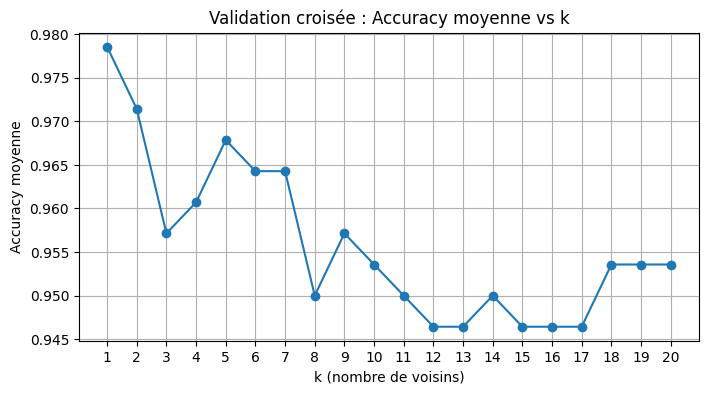

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Recherche du meilleur k via validation croisée (sur X_train et y_train)
k_values = range(1, 21)
scores = []

for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    scores.append(cv_scores.mean())

# Trouver le k optimal
best_k = k_values[np.argmax(scores)]
print(f"Meilleur k trouvé : {best_k} avec une accuracy moyenne de {max(scores):.4f}")

# Affichage de l'évolution des scores en fonction de k
plt.figure(figsize=(8,4))
plt.plot(k_values, scores, marker='o')
plt.title("Validation croisée : Accuracy moyenne vs k")
plt.xlabel("k (nombre de voisins)")
plt.ylabel("Accuracy moyenne")
plt.xticks(k_values)
plt.grid()
plt.show()


Accuracy: 0.9857142857142858
Matrice de confusion :
 [[20  0  0  0]
 [ 0  1  0  0]
 [ 0  0 23  0]
 [ 1  0  0 25]]

Rapport de classification :
               precision    recall  f1-score   support

    Critique       0.95      1.00      0.98        20
      Faible       1.00      1.00      1.00         1
     Moyenne       1.00      1.00      1.00        23
      Élevée       1.00      0.96      0.98        26

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70



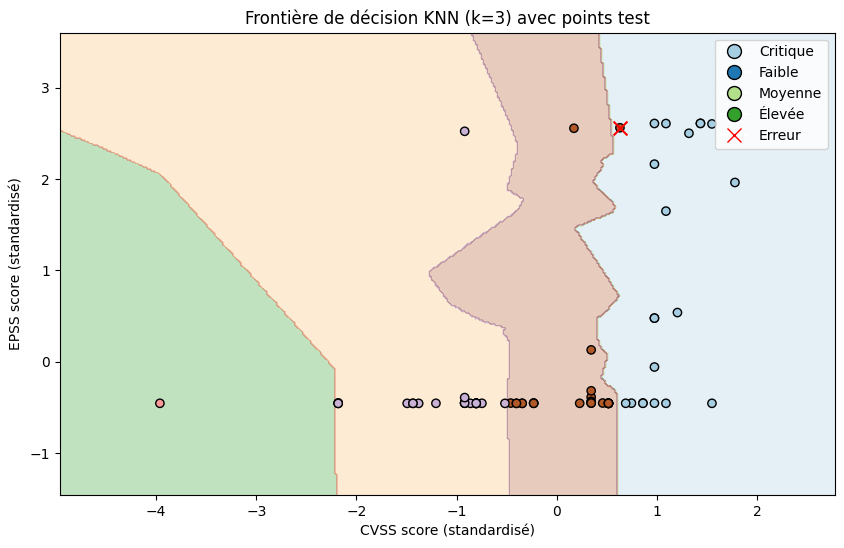

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.lines import Line2D

# Conversion des colonnes en numérique (gestion des erreurs)
df['cvss_score'] = pd.to_numeric(df['cvss_score'], errors='coerce')
df['epss_score'] = pd.to_numeric(df['epss_score'], errors='coerce')

# Suppression des lignes avec NaN sur les colonnes utilisées
df_ml = df.dropna(subset=['cvss_score', 'epss_score', 'base_severity']).copy()

# --- Préparation des données ---
le = LabelEncoder()
df_ml['severity_encoded'] = le.fit_transform(df_ml['base_severity'])

X = df_ml[['cvss_score', 'epss_score']].values
y = df_ml['severity_encoded'].values

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation train/test 80/20 (stratified pour garder proportions des classes)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- Modèle KNN ---
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Prédictions
y_pred = knn.predict(X_test)

# --- Évaluation ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred, target_names=le.classes_))

# --- Visualisation de la frontière de décision ---
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Points test (vraie classe)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k')

# Marquer erreurs par un X rouge
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        plt.scatter(X_test[i, 0], X_test[i, 1], marker='x', c='red', s=100)

plt.xlabel('CVSS score (standardisé)')
plt.ylabel('EPSS score (standardisé)')
plt.title(f'Frontière de décision KNN (k={k}) avec points test')

# Légende
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=cls, markerfacecolor=col, markersize=10, markeredgecolor='k')
    for cls, col in zip(le.classes_, plt.cm.Paired.colors[:len(le.classes_)])
]
legend_elements.append(Line2D([0], [0], marker='x', color='w', label='Erreur', markerfacecolor='r', markersize=10, markeredgecolor='r'))
plt.legend(handles=legend_elements)

plt.show()


L'arbre de décision est un algorithme supervisé qui fonctionne comme un ensemble de questions posées successivement aux données, pour arriver à une décision et à une classification.

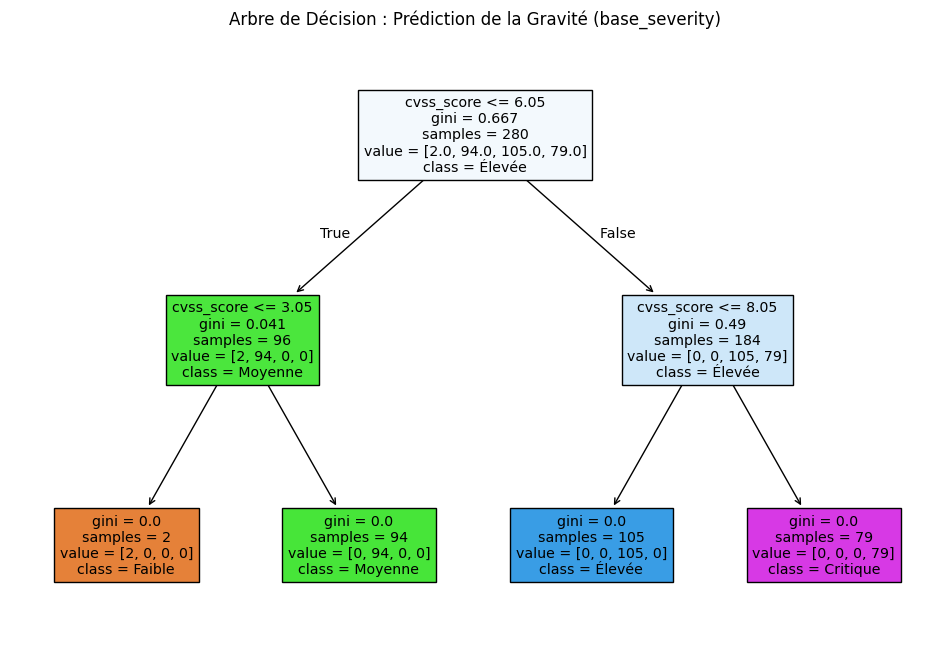

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Mapping de la target 'base_severity' en labels numériques
severity_mapping = {'Faible': 0, 'Moyenne': 1, 'Élevée': 2, 'Critique': 3}
df['severity_encoded'] = df['base_severity'].map(severity_mapping)

# Features et target
features = ['cvss_score', 'epss_score']
target = 'severity_encoded'

# Nettoyage : suppression des lignes avec des NaN dans les colonnes utiles
df_ml = df.dropna(subset=features + [target])

# Données d'entrée et cible
X = df_ml[features]
y = df_ml[target]

# Split des données en train/test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialisation et entraînement de l'arbre de décision
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Prédictions sur le set de test
y_pred = clf.predict(X_test)

# Correction de l'erreur : récupérer les classes que l'arbre connaît
labels = clf.classes_  # classes présentes dans le modèle
target_names = [list(severity_mapping.keys())[list(severity_mapping.values()).index(l)] for l in labels]

# Visualisation de l'arbre
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=features, class_names=target_names, filled=True)
plt.title("Arbre de Décision : Prédiction de la Gravité (base_severity)")
plt.show()

Étape 6 : Génération d'Alertes et Notifications Email

Dans cette partie il faut simuler un envoie de mail lorsque des vulnérabilités critiques sont détectées. Pour cela il faut générer 
un mot de passe d'application google à insérer dans le code. Ensuite la fonction send_email enverra un email avec l'adresse mail renseignée ainssi que l'objet et le texte.

In [53]:
import smtplib
from email.mime.text import MIMEText
import pandas as pd

def send_email(to_email, subject, body):
    from_email = "feracciaurelien7@gmail.com"
    password = ""  #Il faut ici mettre un mot de passe d'application google qu'on a généré au préalable

    msg = MIMEText(body, _charset='utf-8')
    msg['From'] = from_email
    msg['To'] = to_email
    msg['Subject'] = subject

    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.ehlo('localhost')
    server.starttls()
    server.ehlo('localhost')
    server.login(from_email, password)
    server.sendmail(from_email, to_email, msg.as_string())
    server.quit()

# Chargement de la dataframe
df = pd.read_csv('../data/consolidated.csv', sep=',')
df['cvss_score'] = pd.to_numeric(df['cvss_score'], errors='coerce')

# Filtrer les vulnérabilités critiques (CVSS >= 7)
df_critique = df[df['cvss_score'] >= 7]

if not df_critique.empty:
    # Choisir une ligne au hasard
    sample = df_critique.sample(n=1).iloc[0]
    message = (
        f"CVE: {sample['cve_id']}\n"
        f"Titre: {sample['titre']}\n"
        f"Score CVSS: {sample['cvss_score']} ({sample['base_severity']})\n"
        f"Publié le: {sample['date_pub']}\n"
        f"Lien: {sample['lien_bulletin']}\n"
    )
else:
    message = "Aucune alerte CVE critique détectée aujourd'hui."

send_email(
    "feracciaurelien7@gmail.com",
    "Alerte CVE critique",
    message
)


SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. For more information, go to\n5.7.8  https://support.google.com/mail/?p=BadCredentials ffacd0b85a97d-3a568b48564sm19757473f8f.82 - gsmtp')